<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/lcapy_install_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#相關程式庫安裝

In [1]:
!apt update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,237 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,813 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

In [2]:
!apt upgrade

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Calculating upgrade... Done
The following packages were automatically installed and are no longer required:
  linux-headers-5.15.0-134 linux-headers-5.15.0-134-generic
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  linux-headers-5.15.0-135 linux-headers-5.15.0-135-generic
The following packages have been kept back:
  libcudnn9-cuda-12 libcudnn9-dev-cuda-12 libnccl-dev libnccl2
The following packages will be upgraded:
  base-files binutils binutils-common binutils-x86-64-linux-gnu cuda-toolkit-12-config-common
  cuda-toolkit-config-common e2fsprogs libbinutils libc-bin libcap2 libctf-nobfd0 libctf0 libdw1
  libelf1 libext2fs2 libgnutls30 libldap-2.5-0 libpam-modules libpam-modules-bin libpam-runtime
  libpam0g libseccomp2 libss2 libtasn1-6 linux-headers-generic linux-libc-dev logsave openssl
28 upgraded, 2 newly installed, 0 to remove and 4 not upgraded.

In [3]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  linux-headers-5.15.0-134 linux-headers-5.15.0-134-generic
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  imagemagick-6.q16 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x imagemagick-doc
  autotrace cups-bsd | lpr | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer
  povray radiance sane-utils texlive-base-bin transfig ufraw-batch libfftw3-bin

In [4]:
!apt install pdf2svg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  linux-headers-5.15.0-134 linux-headers-5.15.0-134-generic
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libpoppler-glib8
The following NEW packages will be installed:
  libpoppler-glib8 pdf2svg
0 upgraded, 2 newly installed, 0 to remove and 4 not upgraded.
Need to get 140 kB of archives.
After this operation, 514 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler-glib8 amd64 22.02.0-2ubuntu0.6 [134 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pdf2svg amd64 0.2.3-2 [6,888 B]
Fetched 140 kB in 0s (572 kB/s)
Selecting previously unselected package libpoppler-glib8:amd64.
(Reading database ... 156617 files and directories currently installed.)
Preparing to unpack .../libpoppler-glib8_2

In [5]:
!apt install texlive texlive-latex-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  linux-headers-5.15.0-134 linux-headers-5.15.0-134-generic
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  dvisvgm fonts-lato fonts-lmodern fonts-texgyre libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  libavalon-framework-java libcommons-logging-java-

In [6]:
!pip install pdflatex

  Attempting uninstall: attrs
    Found existing installation: attrs 25.3.0
    Uninstalling attrs-25.3.0:
      Successfully uninstalled attrs-25.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jsonschema 4.23.0 requires attrs>=22.2.0, but you have attrs 18.2.0 which is incompatible.
referencing 0.36.2 requires attrs>=22.2.0, but you have attrs 18.2.0 which is incompatible.


In [7]:
!sudo apt-get install texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-latex-recommended is already the newest version (2021.20220204-1).
texlive-latex-recommended set to manually installed.
The following packages were automatically installed and are no longer required:
  linux-headers-5.15.0-134 linux-headers-5.15.0-134-generic
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [8]:
!sudo apt install dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  linux-headers-5.15.0-134 linux-headers-5.15.0-134-generic
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  dvipng
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 78.9 kB of archives.
After this operation, 173 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dvipng amd64 1.15-1.1 [78.9 kB]
Fetched 78.9 kB in 1s (131 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling 

#安裝lcapy程式庫

In [9]:
!pip install lcapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.7 MB/s eta 0:00:00


##範例一：串聯電阻$R_1$和$R_2$再與電池$V_1$串聯

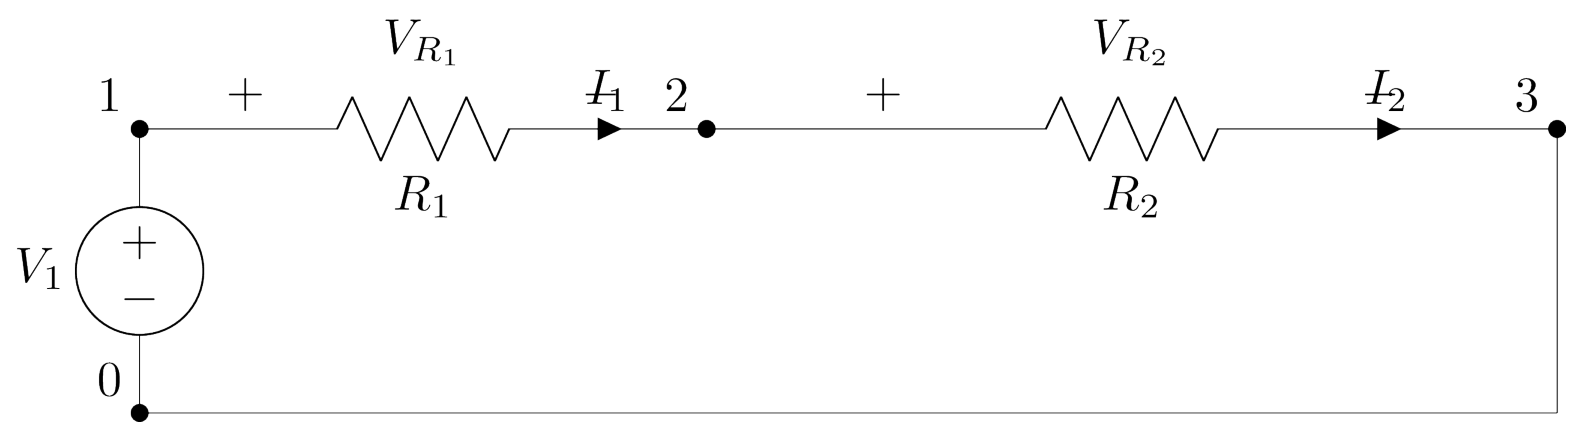

In [10]:
from lcapy import Circuit
cct = Circuit("""
V1 1 0; down
R1 1 2; right=2, i=I_1, v=V_{R_1}
R2 2 3; right=3, i=I_2, v=V_{R_2}
W 3 0_3; down
W 0_3 0; left""")
cct.draw(scale=2, svg=True)

In [11]:
l=cct.mesh_analysis()

In [12]:
l.mesh_equations()

{I₁: -I₁⋅R₁ - I₁⋅R₂ + V₁ = 0}

In [13]:
l.matrix_equations()

                 -1      
[I₁] = [-R₁ - R₂]  ⋅[-V₁]

根據歐姆定律，電阻$R_1$及$R_2$串聯的等效點組等於 $$ R_{tot}=R_1 + R_2 $$

##範例計算

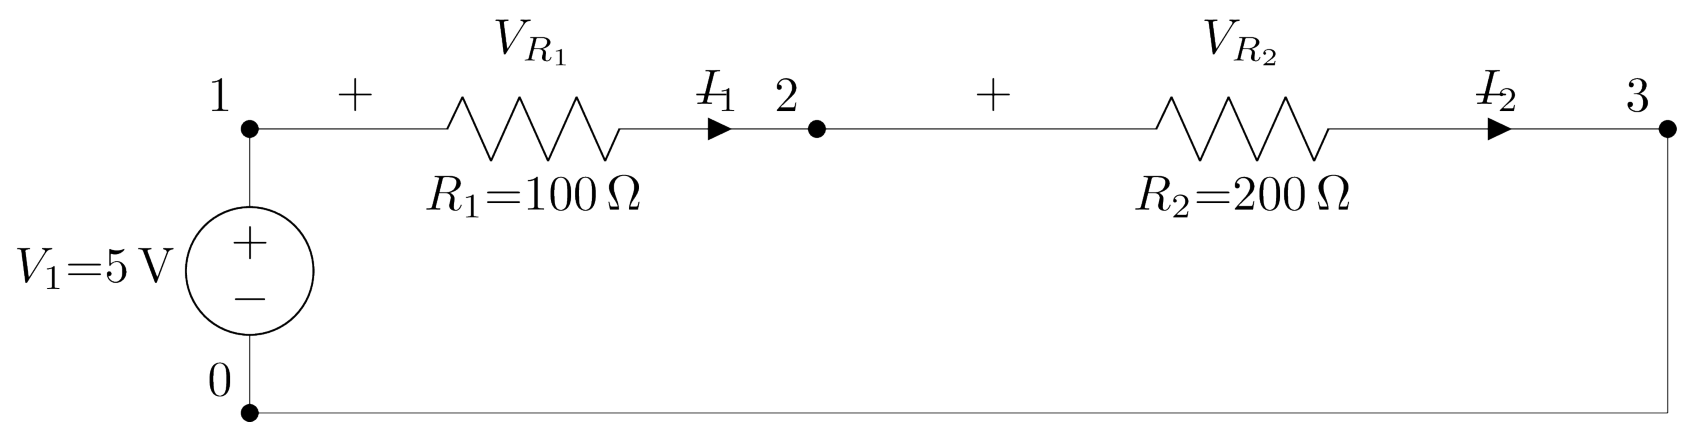

In [14]:
from lcapy import Circuit
cct1 = Circuit("""
V1 1 0 5.0; down
R1 1 2 1E2; right=2, i=I_1, v=V_{R_1}
R2 2 3 2E2; right=3, i=I_2, v=V_{R_2}
W 3 0_3; down
W 0_3 0; left""")
cct1.draw(scale=2)

In [15]:
l1=cct1.mesh_analysis()
l1.mesh_equations()
l1.matrix_equations()

             -1     
[I₁] = [-300]  ⋅[-5]

驗證總電阻等於 $300 \Omega = 100 \Omega + 200 \Omega$

# RC電路分析

In [16]:
from lcapy import Circuit
cct2 = Circuit("""
V 1 0 {10*u(t)}; down
R 1 2 1E3; right=2, i=I, v=V_{R}
C 2 0_1 1E-3; down, i=I, v=V_{C}
W 0 0_1; right""")

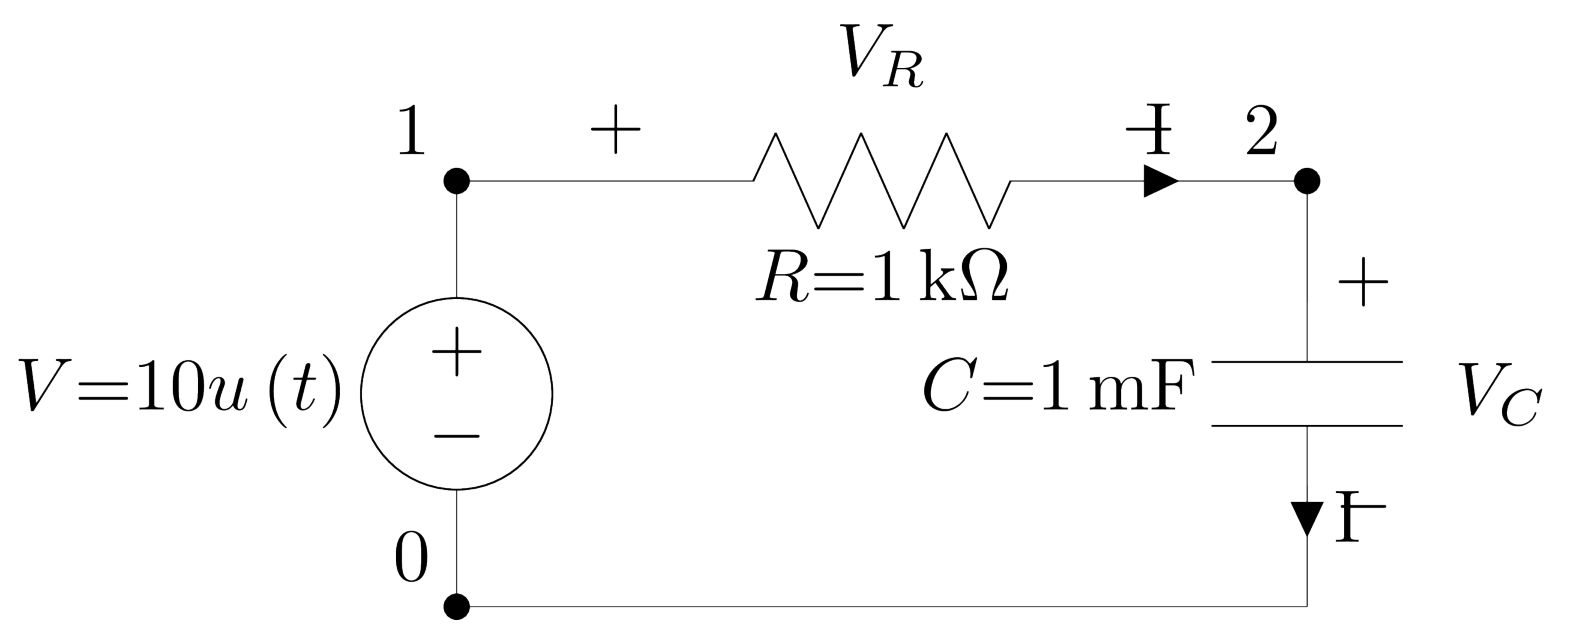

In [17]:
cct2.draw(scale=3)

In [18]:
na2=cct2.nodal_analysis()

In [19]:
na2.nodal_equations()

⎧                                         d            ⎫
⎪                                         ──(v₂(t))    ⎪
⎨                         v₁(t)   v₂(t)   dt           ⎬
⎪1: v₁(t) = 10⋅u(t), 2: - ───── + ───── + ───────── = 0⎪
⎩                         1000    1000      1000       ⎭

In [20]:
na3 = cct2.laplace().nodal_analysis()
na3.nodal_equations()

⎧           10     s⋅V₂(s)   V₁(s)   V₂(s)    ⎫
⎨1: V₁(s) = ──, 2: ─────── - ───── + ───── = 0⎬
⎩           s       1000     1000    1000     ⎭

In [21]:
na3.matrix_equations()

                                -1     
          ⎡   1          0     ⎤   ⎡10⎤
⎡V₁(s)⎤   ⎢                    ⎥   ⎢──⎥
⎢     ⎥ = ⎢          s      1  ⎥  ⋅⎢s ⎥
⎣V₂(s)⎦   ⎢-1/1000  ──── + ────⎥   ⎢  ⎥
          ⎣         1000   1000⎦   ⎣0 ⎦

In [22]:
la = cct2.loop_analysis()
la.mesh_equations()

⎧                                    t               ⎫
⎪                                    ⌠               ⎪
⎨i₁(t): -1000⋅i₁(t) + 10⋅u(t) + 1000⋅⎮  -i₁(τ) dτ = 0⎬
⎪                                    ⌡               ⎪
⎩                                    -∞              ⎭

In [23]:
ss = cct2.state_space()
ss.state_equations()

⎡d         ⎤                                
⎢──(v_C(t))⎥ = [-1]⋅[v_C(t)] + [1]⋅[10⋅u(t)]
⎣dt        ⎦                                

In [24]:
ss.output_equations()

⎡v₁(t) ⎤   ⎡   0   ⎤            ⎡1⎤          
⎢      ⎥   ⎢       ⎥            ⎢ ⎥          
⎢v₂(t) ⎥   ⎢   1   ⎥            ⎢0⎥          
⎢      ⎥   ⎢       ⎥            ⎢ ⎥          
⎢i_V(t)⎥ = ⎢1/1000 ⎥⋅[v_C(t)] + ⎢0⎥⋅[10⋅u(t)]
⎢      ⎥   ⎢       ⎥            ⎢ ⎥          
⎢i_R(t)⎥   ⎢-1/1000⎥            ⎢0⎥          
⎢      ⎥   ⎢       ⎥            ⎢ ⎥          
⎣i_C(t)⎦   ⎣-1/1000⎦            ⎣0⎦          

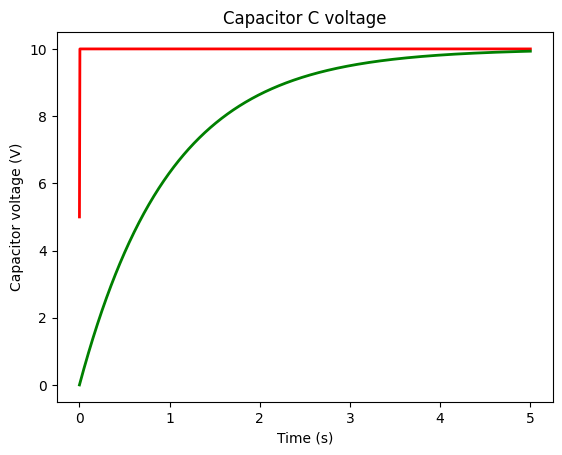

In [31]:
import numpy as np
t = np.linspace(0, 5, 1000)
from matplotlib.pyplot import figure, savefig
fig = figure()
ax = fig.add_subplot(111, title='Capacitor C voltage')
ax.plot(t, cct2.V.v.evaluate(t), linewidth=2, color='red')
ax.plot(t, cct2.C.v.evaluate(t), linewidth=2, color='green')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Capacitor voltage (V)');

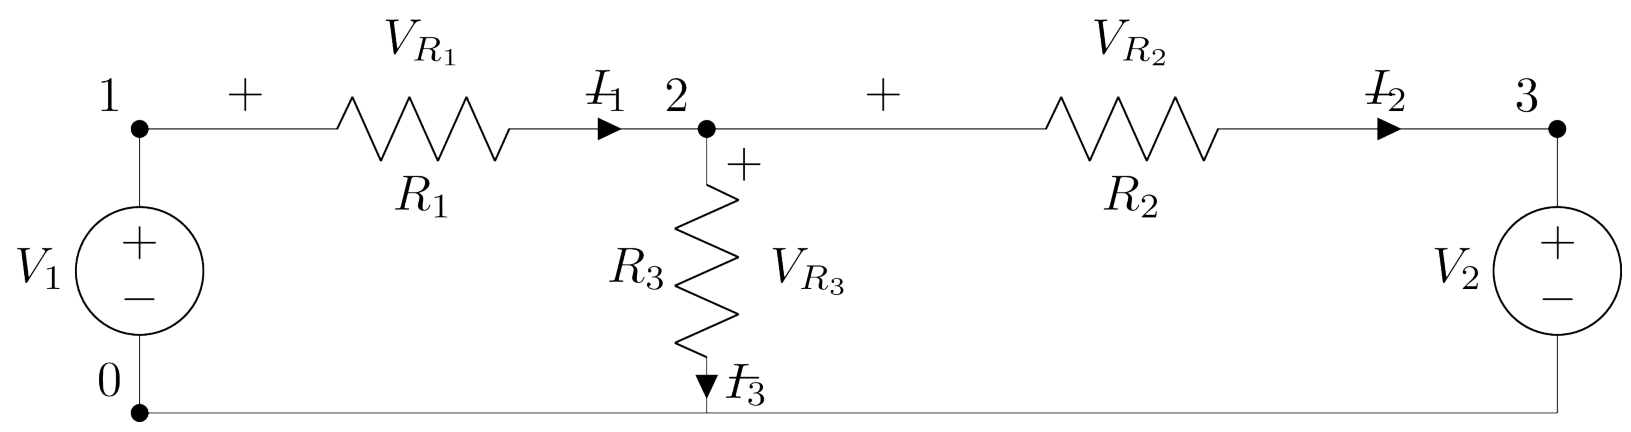

In [26]:
from lcapy import Circuit
cct3 = Circuit("""
V1 1 0; down
R1 1 2; right=2, i=I_1, v=V_{R_1}
R2 2 3; right=3, i=I_2, v=V_{R_2}
R3 2 0_2; down, i=I_3, v=V_{R_3}
V2 3 0_3; down
W 0 0_2; right
W 0_2 0_3; right""")
cct3.draw(scale=2)

In [27]:
l=cct3.mesh_analysis()
l.mesh_equations()

{I₁: -I₁⋅R₁ + R₃⋅(-I₁ + I₂) + V₁ = 0, I₂: -I₂⋅R₂ - R₃⋅(-I₁ + I₂) - V₂ = 0}

In [28]:
l.matrix_equations()

                           -1      
⎡I₁⎤   ⎡-R₁ - R₃     R₃   ⎤   ⎡-V₁⎤
⎢  ⎥ = ⎢                  ⎥  ⋅⎢   ⎥
⎣I₂⎦   ⎣   R₃     -R₂ - R₃⎦   ⎣V₂ ⎦